# Predicting car prices

### Dataset: https://archive.ics.uci.edu/ml/datasets/automobile

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv("C://Users//johng//Desktop//data//imports-85.data", encoding="utf-8", names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width','height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price'])

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Numeric columns: symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-rate, city-mpg, highway-mpg
# Target column: price (and it is an object column)

In [5]:
clean_df = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price']
cars = cars[clean_df]
cars.shape

(205, 15)

In [6]:
# Verifying the clean dataframe columns
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [10]:
# Remove '?' from normalized_losses and change its type to float
cars["normalized-losses"] = cars.loc[cars["normalized-losses"] != '?', "normalized-losses"].astype(float)
# Remove all NA values
cars.dropna(axis=0, inplace=True)
# Remove '?' from 'bore' and change its type to float
cars["bore"] = cars.loc[cars["bore"] != '?', "bore"].astype(float)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         164 non-null    float64
 2   length             164 non-null    float64
 3   width              164 non-null    float64
 4   height             164 non-null    float64
 5   curb-weight        164 non-null    int64  
 6   engine-size        164 non-null    int64  
 7   bore               160 non-null    float64
 8   stroke             164 non-null    object 
 9   compression-rate   164 non-null    float64
 10  horsepower         164 non-null    object 
 11  peak-rpm           164 non-null    object 
 12  city-mpg           164 non-null    int64  
 13  highway-mpg        164 non-null    int64  
 14  price              164 non-null    object 
dtypes: float64(7), int64(4), object(4)
memory usage: 20.5+ KB


In [11]:
# Verify the other columns for numeric values
cars["stroke"].value_counts()
# change object type columns to float
cars["stroke"] = pd.to_numeric(cars["stroke"])
cars["horsepower"] = pd.to_numeric(cars["horsepower"])
cars["peak-rpm"] = pd.to_numeric(cars["peak-rpm"])
cars["price"] = pd.to_numeric(cars["price"])

In [ ]:
cars.shape

## Normalize columns (x - mean / standard deviation). Each value will be converted into a z-score so that the mean of each feature is 0 and its standard deviation is 1.

In [12]:
normalized_cars = (cars - cars.mean()) / (cars.std())
# mantain the column 'price' in the normalized data frame
normalized_cars['price'] = cars['price'].copy()

# KNN

## 1) Hyper parameter optimization - Searching for the optimal k, with a train and test set: 80/20. 

In [13]:
# 80% of the normalized dataset is for training
train_df = normalized_cars.iloc[0:128]
# 20% of the normalized dataset is for testing
test_df = normalized_cars.iloc[128:]

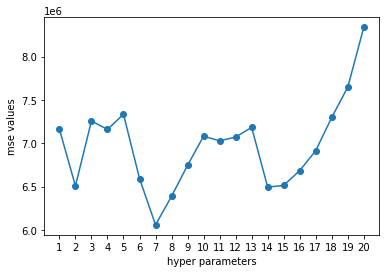

In [14]:
hyper_params = [x for x in range(1, 21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='auto')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = round(mse ** (1/2))
    mse_values.append(mse)
    
plt.plot(hyper_params, mse_values, marker="o")
plt.xlabel("hyper parameters")
plt.ylabel("mse values")
plt.xticks(hyper_params)
plt.show()

### The optimal k is 7, with the min mse, partition of 80/20 and ALL the features of normalized cars dataframe. The rmse value for k=7 is 2461. The actual price will have a difference against the predicted price of 2461 on average. 

### But k=7 will be the better response for a partition different of the ratio 80/20? To answer that we will analyze the K-fold cross validation (where K in this situation is the partition ratio of the dataset, not the hyper-parameter previously studied).


## 2) K-fold cross validation (how many parts the dataset shall be split to find the optimal solution):

In [15]:
features = ['width']

num_folds = list(range(2, len(normalized_cars)))
avg_rmse_list =[]
d = {}

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, normalized_cars[features], normalized_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    avg_rmse_list.append(avg_rmse) 
    d[fold] = avg_rmse
    print(str(fold), "folds-> ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

2 folds->  avg RMSE:  2820.4585300051303 std RMSE:  353.6118069596953
3 folds->  avg RMSE:  2689.97702751408 std RMSE:  90.25889062856182
4 folds->  avg RMSE:  2694.8500376817815 std RMSE:  627.1929953423432
5 folds->  avg RMSE:  2621.9460660482696 std RMSE:  271.75125111764163
6 folds->  avg RMSE:  2663.832647093048 std RMSE:  436.14694485060687
7 folds->  avg RMSE:  2660.4357344088835 std RMSE:  533.0297110587202
8 folds->  avg RMSE:  2632.1270668731586 std RMSE:  694.5891951964876
9 folds->  avg RMSE:  2592.988257874705 std RMSE:  726.0041364605904
10 folds->  avg RMSE:  2689.8652582123395 std RMSE:  669.8791912817293
11 folds->  avg RMSE:  2639.110698102724 std RMSE:  848.6637018254722
12 folds->  avg RMSE:  2607.731542676361 std RMSE:  821.0552867802594
13 folds->  avg RMSE:  2549.394918791358 std RMSE:  869.2435877732921
14 folds->  avg RMSE:  2581.386929719709 std RMSE:  759.0475254776376
15 folds->  avg RMSE:  2525.973606738033 std RMSE:  1022.1615897290395
16 folds->  avg RMSE

In [16]:
print(min(d.items(), key=lambda x: x[1]))

(125, 1783.4056419294868)


### The lowest rmse is with 125 folds. 

### Now we will study the best model with both, k range from 1 to 10, and folds from 2 to 130:

In [45]:
hyper_params = [x for x in range(1, 10)]
features = ['width']
num_folds = list(range(2, 130))
avg_rmse_list =[]
d2 = {}
d3 = {}

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    for hp in hyper_params:
        model = KNeighborsRegressor(n_neighbors=hp, algorithm='auto')
        mses = cross_val_score(model, normalized_cars[features], normalized_cars["price"], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        avg_rmse_list.append(avg_rmse)        
        print(str(fold), "folds-> ", str(hp), "k value->", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
        

2 folds->  1 k value-> avg RMSE:  3687.7711496711763 std RMSE:  388.4028805929879
2 folds->  2 k value-> avg RMSE:  3039.576450187049 std RMSE:  145.6465929254739
2 folds->  3 k value-> avg RMSE:  2833.9249203919035 std RMSE:  279.9706279704867
2 folds->  4 k value-> avg RMSE:  2791.0783148497762 std RMSE:  255.7935189947325
2 folds->  5 k value-> avg RMSE:  2820.4585300051303 std RMSE:  353.6118069596953
2 folds->  6 k value-> avg RMSE:  2878.430656415736 std RMSE:  480.32260692883074
2 folds->  7 k value-> avg RMSE:  2931.4179154506933 std RMSE:  550.5086092212864
2 folds->  8 k value-> avg RMSE:  2997.2755506072644 std RMSE:  587.5980888041552
2 folds->  9 k value-> avg RMSE:  3105.0186594679426 std RMSE:  506.73625410383534
3 folds->  1 k value-> avg RMSE:  2958.4268280005103 std RMSE:  159.6248857024868
3 folds->  2 k value-> avg RMSE:  2629.234704346672 std RMSE:  215.26521142076462
3 folds->  3 k value-> avg RMSE:  2561.02037103027 std RMSE:  182.88193918404122
3 folds->  4 k va

### The best model, without feature selection, is with k=5 and 125 partitions.

## 3) Finally, we will need to study which features have the min value for mse. With 'SelectKBest' we will select the k top features with the highest F-Statistic.

In [73]:
all_feature_cols = [col for col in cars.columns if col != "price"]

# Series of feature:data type
fdt = cars[all_feature_cols].dtypes

# Identify numeric features
all_numeric_features = fdt.index[fdt != "object"]

# Standardize
cars[all_numeric_features] = cars[all_numeric_features].apply(zscore, axis = 0, ddof = 1)

cars[all_numeric_features].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
3,1.199357,0.302953,0.370653,0.310093,0.185034,-0.254628,-0.331909,-0.405604,0.552964,-0.037379,0.199995,0.824754,-0.412130,-0.321187
4,1.199357,0.225490,0.370653,0.412815,0.185034,0.758061,0.555922,-0.405604,0.552964,-0.552510,0.624475,0.824754,-1.398776,-1.563240
6,1.030829,1.464896,1.764730,2.980870,0.799984,0.799650,0.555922,-0.405604,0.552964,-0.423727,0.461214,0.824754,-1.234335,-1.097470
8,1.030829,1.464896,1.764730,2.980870,0.887834,1.302875,0.391509,-0.630031,0.552964,-0.475241,1.440783,0.824754,-1.563217,-1.873754
10,1.985820,0.574073,0.387971,-0.408963,0.185034,-0.134020,-0.364792,0.753933,-1.486397,-0.346458,0.167343,1.469512,-0.576571,-0.476444


In [74]:
all_numeric_features.to_list()

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [86]:
#skb = SelectKBest(
#    score_func = f_regression,
#    k = 3,
#)

# X = cars[all_numeric_features]
# y = cars["price"]

# X_new = skb.fit_transform(X, y)

# best_features = list(skb.get_feature_names_out())
# print("Top 3 features:", best_features)